# Credit Card Fraud Detection using Neural Networks





## 1. Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

## 2. Reading the dataset

In [2]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Reading csv

data = pd.read_csv("/content/drive/My Drive/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Describing the data

data.describe(include = "all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Checking for any missing values

data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 3. Exploring the data


In [6]:
# Converting pandas dataframe to numpy array

data = data.to_numpy()

In [7]:
# Splitting the data into input and output

X = data[:,0:30] #input
Y = data[:, 30] #output
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [8]:
# Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [9]:
# Checking to see if there are fraud values in both sets

print(np.where(Y_train == 1))
print(np.where(Y_test == 1))

(array([   624,    887,   1300,   1384,   2872,   3631,   3665,   5340,
         5451,   6042,   6440,   6820,   7792,   8092,   8781,   9816,
        10780,  10799,  10926,  10988,  11200,  11812,  12446,  12624,
        13042,  13248,  13600,  14359,  15267,  15438,  15859,  17674,
        18029,  18401,  18991,  19905,  20498,  20506,  20548,  20590,
        21233,  21561,  23416,  23713,  24218,  24749,  25252,  25334,
        26177,  26313,  26472,  26740,  27585,  27598,  27724,  27914,
        29938,  30927,  31099,  31408,  32157,  33243,  33536,  33769,
        34404,  36297,  36851,  36896,  37567,  37720,  37842,  38084,
        38911,  39584,  39615,  40690,  41273,  41636,  41910,  42308,
        42799,  43673,  44109,  44230,  44735,  44901,  45162,  45483,
        45755,  45802,  46136,  46931,  46951,  47222,  47263,  47466,
        48401,  49113,  49906,  50127,  50198,  50596,  50888,  52128,
        53765,  54102,  54957,  55253,  55340,  55464,  56320,  56397,
     

In [10]:
# Shapes of the newly formed arrays

m_train = X_train.shape[0]
m_test = X_test.shape[0]

print("No of training Examples : "+str(m_train))   
print("No of test Examples : "+str(m_test))       
print("Shape of training data : "+str(X_train.shape))
print("Shape of test data : "+str(X_test.shape))

No of training Examples : 227845
No of test Examples : 56962
Shape of training data : (227845, 30)
Shape of test data : (56962, 30)


In [11]:
# Flattening the data

X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
Y_train_flatten = Y_train.reshape(Y_train.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T
Y_test_flatten = Y_test.reshape(Y_test.shape[0],-1).T

print("No of training Examples : "+str(X_train_flatten.shape))  
print("No of test Examples : "+str(Y_train_flatten.shape)) 
print("No of X_test Examples : "+str(X_test_flatten.shape))  
print("No of Y_test Examples : "+str(Y_test_flatten.shape))

No of training Examples : (30, 227845)
No of test Examples : (1, 227845)
No of X_test Examples : (30, 56962)
No of Y_test Examples : (1, 56962)


In [12]:
# Normalizing the data

X_train_set = normalize(X_train_flatten)
Y_train_set = Y_train_flatten

print("No of X_train_set shape : "+str(X_train_set.shape))  
print("No of Y_train_set shape : "+str(Y_train_set.shape)) 

No of X_train_set shape : (30, 227845)
No of Y_train_set shape : (1, 227845)


## 4. Initializing Parameters

In [13]:
# We use random initialization for weights

def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
            
    return parameters

In [14]:
# Testing if the function works

parameters = initialize_parameters([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 9.52138462e-04 -2.93140734e-03  2.43061642e-03  6.34565102e-03
   8.65531932e-03]
 [-1.96607990e-03  6.08357421e-04 -2.11062301e-02 -2.44369533e-02
   5.51137518e-03]
 [-1.85441045e-02 -6.41637874e-03 -6.18441411e-03  3.80980312e-03
  -9.00057833e-05]
 [ 2.84785895e-03 -4.20824564e-03 -1.85349411e-03  9.47290877e-03
  -1.23128916e-03]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.02063284  0.0018386  -0.00089302  0.00849966]
 [-0.00021157  0.00882069  0.01084461 -0.00754515]
 [-0.00102871 -0.00568433  0.00143861  0.00800822]]
b2 = [[0.]
 [0.]
 [0.]]


## 5. Creating Activation Functions and their Derivation Functions



In [15]:
# Sigmoid Function

def sigmoid(z):
  
    s = 1/(1+np.exp(-z))
    cache = z
    return s,cache

In [16]:
# Testing that it works

sigmoid(np.array(([2,3,5,7])))

(array([0.88079708, 0.95257413, 0.99330715, 0.99908895]), array([2, 3, 5, 7]))

In [17]:
# ReLu Function

def relu(z):
    
    r = np.maximum(0,z)
    cache = z
    return r,cache

In [18]:
# Testing that it works

relu(np.array([2,-3,5,-7]))

(array([2, 0, 5, 0]), array([ 2, -3,  5, -7]))

In [19]:
# Relu Backward Function

def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    return dZ

In [20]:
# Sigmoid Backward Function

def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
           
    return dZ

## 6. Forward Propagation

In [21]:
# Linear Forward

def linear_forward(A, W, b):

    Z = np.dot(W,A)+b
    cache = (A, W, b)
    
    return Z, cache

In [22]:
# Linear Activation Forward

def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)

    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache, activation_cache)

    return A, cache

In [23]:
# L Layer Forward Propagation

def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A, cache = linear_activation_forward(A,parameters["W" + str(l)],parameters["b" + str(l)],activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters["W" + str(L)],parameters["b" + str(L)],activation="sigmoid")
    caches.append(cache)
            
    return AL, caches

## 7. Cost Function


In [24]:
def cost_function(AL, Y):
    m = Y.shape[1]

    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

## 8. Backward Propagation

In [25]:
# Linear Backward 

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [26]:
# Linear Activation Backward

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [27]:
# Backward Propagation

def backward_propagation(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,activation="sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+2)],current_cache,activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## 9. Updating Parameters

In [28]:
# Update Parameters 

def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(1,L+1):
        parameters["W"+str(l)]=parameters["W" + str(l)]-learning_rate*grads["dW" + str(l)]
        parameters["b"+str(l)]=parameters["b" + str(l)]-learning_rate*grads["db" + str(l)]
    return parameters

## 10. Creating the Neural Network Model

In [29]:
def nn_model(X,Y,layer_dims,learning_rate=0.01, num_iterations=5000,print_cost=False):
    costs = []
    
    #initialize parameters 
    parameters = initialize_parameters(layer_dims)
    # for loop for iterations/epoch 
    for i in range(0,num_iterations):
        #forward_propagation
        AL, caches = forward_propagation(X, parameters)
        
        #compute cost
        cost = cost_function(AL, Y)
        
        #backward_propagation 
        grads = backward_propagation(AL, Y, caches)
        
        #update parameters
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 11. Running the Model

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.497206
Cost after iteration 200: 0.375556
Cost after iteration 300: 0.296549
Cost after iteration 400: 0.242656
Cost after iteration 500: 0.204224
Cost after iteration 600: 0.175755
Cost after iteration 700: 0.153986
Cost after iteration 800: 0.136893
Cost after iteration 900: 0.123168
Cost after iteration 1000: 0.111937
Cost after iteration 1100: 0.102599
Cost after iteration 1200: 0.094725
Cost after iteration 1300: 0.088005
Cost after iteration 1400: 0.082210
Cost after iteration 1500: 0.077166
Cost after iteration 1600: 0.072739
Cost after iteration 1700: 0.068825
Cost after iteration 1800: 0.065342
Cost after iteration 1900: 0.062224
Cost after iteration 2000: 0.059417
Cost after iteration 2100: 0.056878
Cost after iteration 2200: 0.054572
Cost after iteration 2300: 0.052467
Cost after iteration 2400: 0.050541
Cost after iteration 2500: 0.048770
Cost after iteration 2600: 0.047138
Cost after iteration 2700: 0.045628
Cost

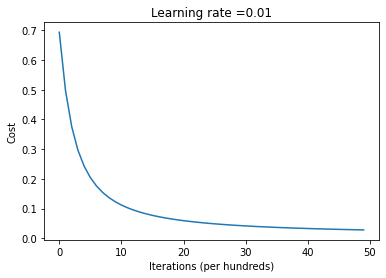

In [30]:
layer_dims = [30,25,20,15,10,5,1]

parameters = nn_model(X_train_set,Y_train_set,layer_dims,learning_rate=0.01,num_iterations = 5000, print_cost = True)

## 12. Predict Function and Accuracy

In [31]:
# Predict function

def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Forward propagation
    probablities, caches = forward_propagation(X, parameters)

    
    # convert probablities to 0/1 predictions
    for i in range(0, probablities.shape[1]):
        if probablities[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [32]:
# Training Set Accuracy

pred_train = predict(X_train_set, Y_train_set, parameters)

Accuracy: 0.9982575873949391


In [33]:
# Test Set Accuracy

pred_test = predict(X_test_flatten, Y_test_flatten, parameters)

Accuracy: 0.9983322214809873
